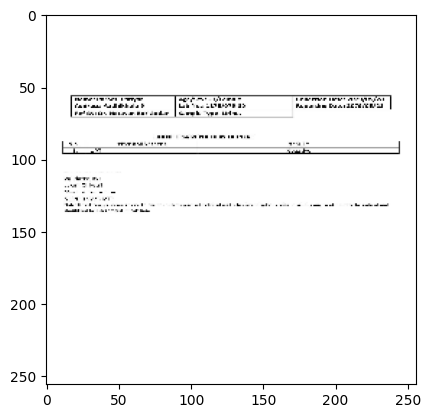

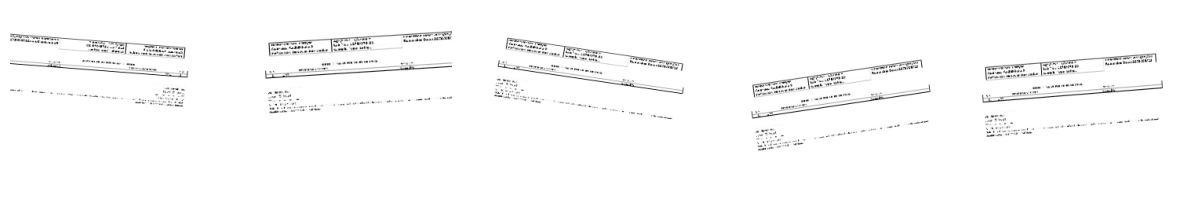

In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create directories for the dataset
os.makedirs('data/images', exist_ok=True)
os.makedirs('data/annotations', exist_ok=True)

# Function to preprocess the images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (256, 256))
    return image

# Example of loading and preprocessing an image
sample_image_path = 'data/images/labReport_Page_001.jpg'  # Replace with your image path
preprocessed_image = preprocess_image(sample_image_path)
plt.imshow(preprocessed_image)
plt.show()

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Example of augmenting an image
sample_image = np.expand_dims(preprocessed_image, 0)
augmented_images = [next(datagen.flow(sample_image, batch_size=1))[0].astype(np.uint8) for i in range(5)]

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for img, ax in zip(augmented_images, axes):
    ax.imshow(img)
    ax.axis('off')
plt.show()
